# LeNet



In [1]:
import torch
from torch import nn
from torch.ao.quantization.observer import HistogramObserver
# from torch.nn.utils import parametrize

from torch_book.data.simple_vision import load_data_cifar10, load_data_fashion_mnist
from torch_book.tools import train, try_gpu

In [3]:
class LeNet(nn.Module):
    def __init__(self, activation=nn.Sigmoid):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        self.sigmoid1 = activation()
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.sigmoid2 = activation()
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(16 * 5 * 5, 120)
        self.sigmoid3 = activation()
        self.linear2 = nn.Linear(120, 84)
        self.sigmoid4 = activation()
        self.linear3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.sigmoid1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.sigmoid2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.sigmoid3(x)
        x = self.linear2(x)
        x = self.sigmoid4(x)
        x = self.linear3(x)
        return x

In [4]:
net = LeNet()

loss 0.017, train acc 0.996, test acc 0.902
65522.6 examples/sec on cuda:0


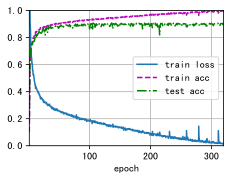

In [6]:
batch_size = 256
lr, num_epochs = 0.9, 320

train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)
train(net, train_iter, test_iter, num_epochs, lr, try_gpu())

In [ ]:
class QuantSigmoid(nn.Module):
    def __init__(self):
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        print("Sigmoid", x)
        x = self.sigmoid(x)
        return x

In [8]:
for xs, ys in train_iter:
    break

In [10]:
traced_cell = torch.jit.trace(net.to(torch.device("cpu")), xs)

In [13]:
print(traced_cell.code)

def forward(self,
    x: Tensor) -> Tensor:
  linear3 = self.linear3
  sigmoid4 = self.sigmoid4
  linear2 = self.linear2
  sigmoid3 = self.sigmoid3
  linear1 = self.linear1
  flatten = self.flatten
  pool2 = self.pool2
  sigmoid2 = self.sigmoid2
  conv2 = self.conv2
  pool1 = self.pool1
  sigmoid1 = self.sigmoid1
  conv1 = self.conv1
  _0 = (sigmoid1).forward((conv1).forward(x, ), )
  _1 = (conv2).forward((pool1).forward(_0, ), )
  _2 = (pool2).forward((sigmoid2).forward(_1, ), )
  _3 = (linear1).forward((flatten).forward(_2, ), )
  _4 = (linear2).forward((sigmoid3).forward(_3, ), )
  _5 = (linear3).forward((sigmoid4).forward(_4, ), )
  return _5

